In [122]:
import pandas as pd

In [123]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [124]:
# load data csv file
path = 'SocialAds.csv'
df = pd.read_csv(path)
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


In [125]:
#information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              398 non-null    float64
 1   EstimatedSalary  396 non-null    float64
 2   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [126]:
df["Age"].value_counts()


35.0    32
37.0    20
41.0    16
42.0    16
26.0    15
39.0    15
40.0    15
47.0    14
48.0    13
27.0    13
38.0    13
28.0    12
36.0    12
46.0    12
31.0    11
30.0    11
49.0    10
29.0    10
33.0     9
32.0     9
24.0     9
59.0     7
19.0     7
45.0     7
20.0     7
60.0     7
34.0     6
23.0     6
52.0     6
25.0     6
58.0     6
53.0     5
57.0     5
22.0     5
18.0     5
21.0     4
50.0     4
54.0     4
55.0     3
56.0     3
51.0     3
43.0     3
44.0     2
Name: Age, dtype: int64

In [127]:
df["EstimatedSalary"].value_counts()



72000.0     12
80000.0     10
79000.0     10
75000.0      9
71000.0      9
            ..
114000.0     1
142000.0     1
91000.0      1
102000.0     1
139000.0     1
Name: EstimatedSalary, Length: 117, dtype: int64

In [128]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [129]:
df.describe()

,Age,EstimatedSalary,Purchased
count,398.000000,396.00000,400.000000
mean,37.658291,69969.69697,0.357500
std,10.480103,34112.23606,0.479864
min,18.000000,15000.00000,0.000000
25%,30.000000,43000.00000,0.000000
50%,37.000000,70000.00000,0.000000
75%,46.000000,88000.00000,1.000000
max,60.000000,150000.00000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

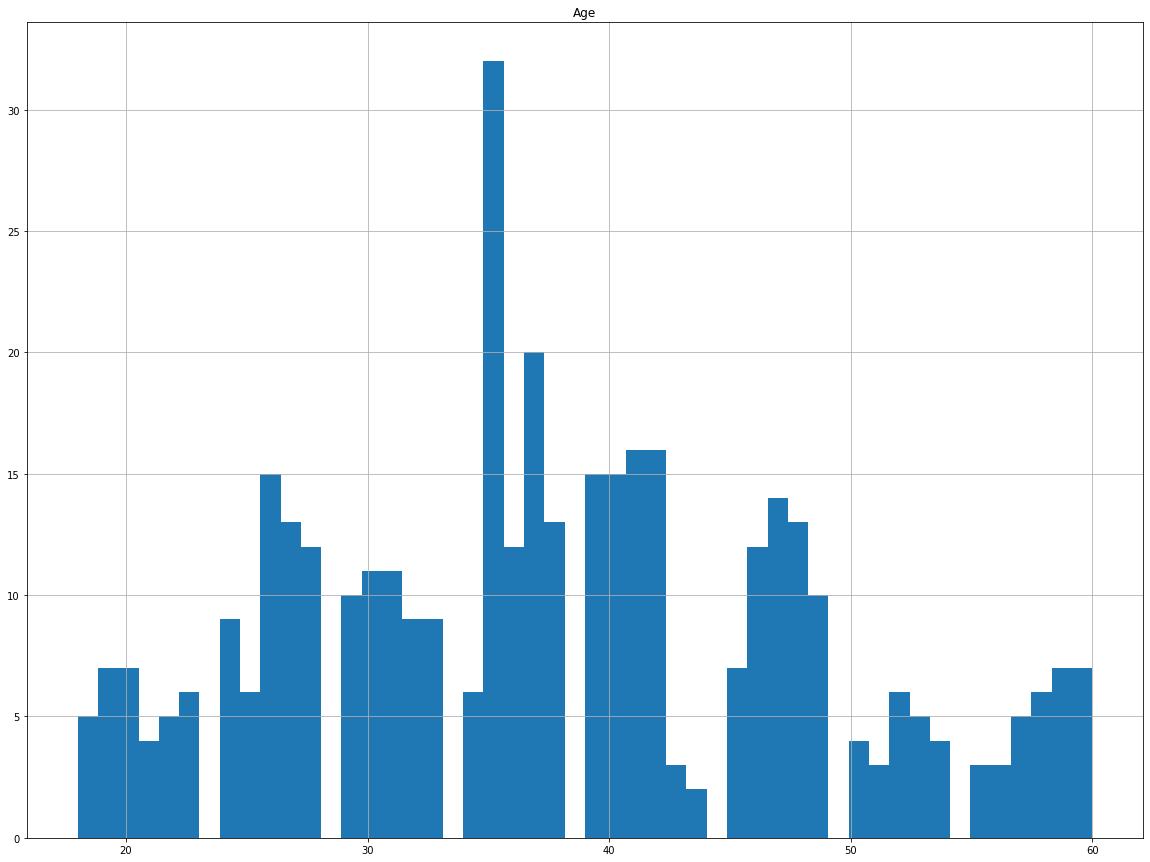

In [130]:
df.hist("Age", bins=50, figsize=(20,15)) 


array([[<AxesSubplot:title={'center':'EstimatedSalary'}>]], dtype=object)

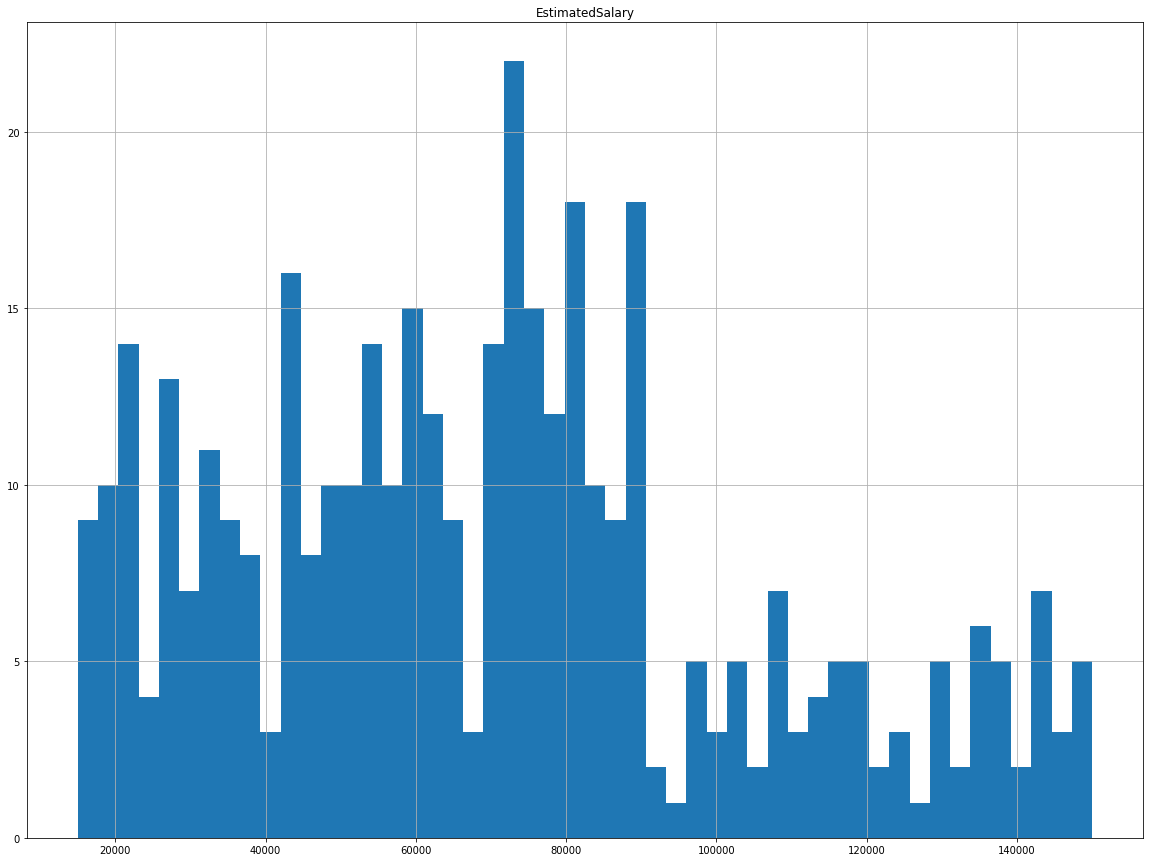

In [131]:
df.hist("EstimatedSalary", bins=50, figsize=(20,15)) 


array([[<AxesSubplot:title={'center':'Purchased'}>]], dtype=object)

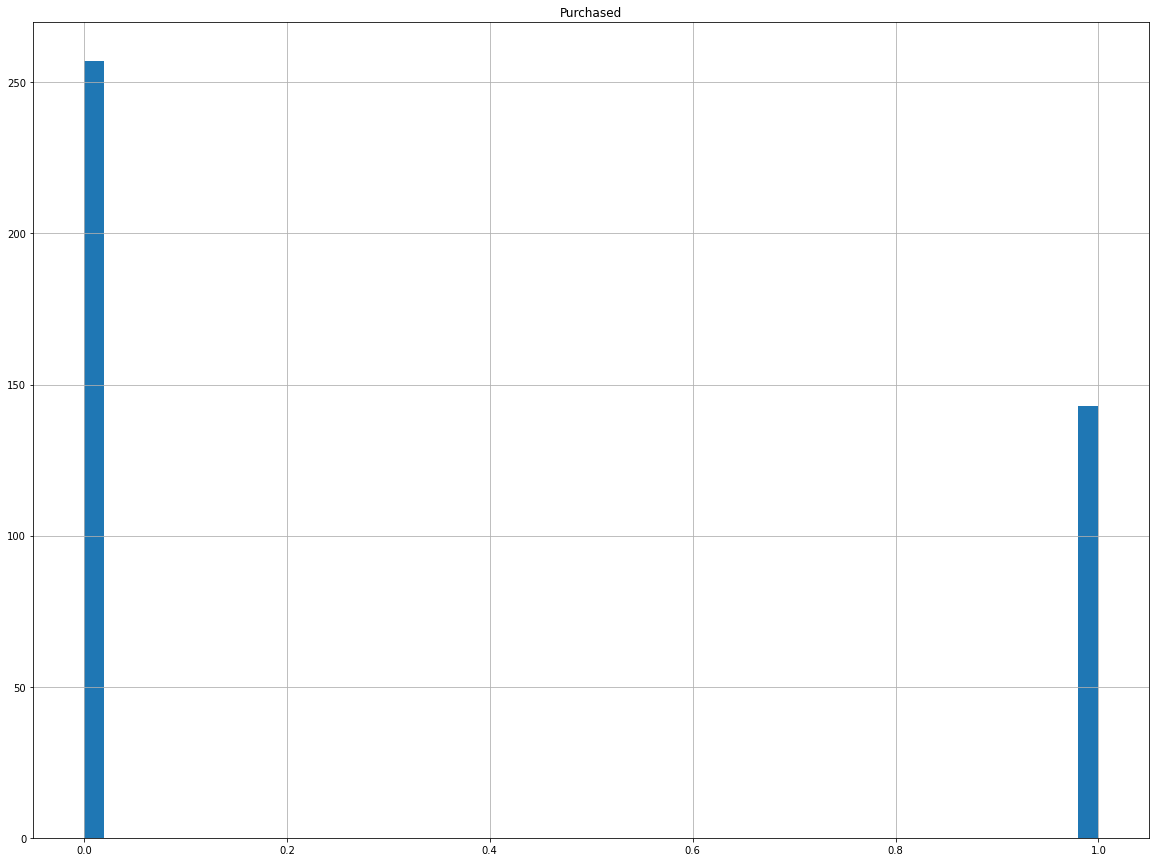

In [132]:
df.hist("Purchased", bins=50, figsize=(20,15)) 


#  Split the data into train and test set

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [134]:
len(test_set)

80

In [135]:
len(train_set) 

320

In [136]:
df_train_set = train_set.copy() 

In [137]:
# get coef for train set
corr_matrix = df_train_set.corr()
corr_matrix

,Age,EstimatedSalary,Purchased
Age,1.000000,0.144861,0.582595
EstimatedSalary,0.144861,1.000000,0.379985
Purchased,0.582595,0.379985,1.000000


In [138]:
df_train_set.isnull().sum()

Age                2
EstimatedSalary    0
Purchased          0
dtype: int64

In [139]:
df_train_set['Age'] = df_train_set['Age'].fillna(df_train_set['Age'].mean())
df_train_set.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [140]:
X_train = (df_train_set[['Age','EstimatedSalary']])
y_train = (df_train_set['Purchased'])

In [141]:
test_set.isnull().sum()

Age                0
EstimatedSalary    4
Purchased          0
dtype: int64

In [142]:
test_set['EstimatedSalary'] = test_set['EstimatedSalary'].fillna(test_set['EstimatedSalary'].mean())
test_set.isnull().sum()

/var/folders/vn/x248gnvs0p5813c7v6k4t2m80000gn/T/ipykernel_2059/2438159021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['EstimatedSalary'] = test_set['EstimatedSalary'].fillna(test_set['EstimatedSalary'].mean())


Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [143]:
X_test = (test_set[['Age','EstimatedSalary']])
y_test = (test_set['Purchased'])

# Train model svc linear

In [144]:
svm_clf = Pipeline([ ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=2, loss="hinge")),])
svm_clf.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=2, loss='hinge'))])

# Predict model

In [145]:
predict=svm_clf.predict(X_train)
predict

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [146]:
len(predict)

320

# Evaluate 

In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
# Model Evaluation for 
print(accuracy_score(y_train,predict))
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

0.828125
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       205
           1       0.85      0.63      0.73       115

    accuracy                           0.83       320
   macro avg       0.83      0.79      0.80       320
weighted avg       0.83      0.83      0.82       320

[[192  13]
 [ 42  73]]


# Train model svc

In [189]:
from sklearn.svm import SVC


In [149]:
kernel_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel="linear", coef0=2,gamma='auto'))
])
kernel_svc

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(coef0=2, gamma='auto', kernel='linear'))])

In [150]:
kernel_svc.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(coef0=2, gamma='auto', kernel='linear'))])

# Predict svc

In [151]:
predict=kernel_svc.predict(X_train)
predict

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

# Evaluate

In [152]:
print(accuracy_score(y_train,predict))
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

0.825
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       205
           1       0.85      0.63      0.72       115

    accuracy                           0.82       320
   macro avg       0.83      0.78      0.80       320
weighted avg       0.83      0.82      0.82       320

[[192  13]
 [ 43  72]]


# Train model sgd

In [153]:
 from sklearn.linear_model import SGDClassifier

sgd=Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss= "hinge")),])
sgd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

# Predict

In [154]:
predict=sgd.predict(X_train)
predict

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

# Evaluate

In [155]:
print(accuracy_score(y_train,predict))
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

0.784375
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       205
           1       0.65      0.88      0.75       115

    accuracy                           0.78       320
   macro avg       0.78      0.80      0.78       320
weighted avg       0.82      0.78      0.79       320

[[150  55]
 [ 14 101]]


# Train model rbf 

In [156]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", random_state=0))
    ])
rbf_kernel_svm_clf

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(random_state=0))])

In [157]:
rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(random_state=0))])

# Predict

In [158]:
predict=rbf_kernel_svm_clf.predict(X_train)
predict

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

# Evaluate

In [159]:
print(accuracy_score(y_train,predict))
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

0.903125
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       205
           1       0.84      0.90      0.87       115

    accuracy                           0.90       320
   macro avg       0.89      0.90      0.90       320
weighted avg       0.91      0.90      0.90       320

[[186  19]
 [ 12 103]]


# Train model SVC use RandomizedSearchCV

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [180]:
SVC=SVC()
distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
search_cv = RandomizedSearchCV(SVC, distributions,
                                   n_iter=10, verbose=2, cv=3)


In [181]:
search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=8.977461393721729, gamma=0.0011175719610997262; total time=   0.0s
[CV] END ...C=8.977461393721729, gamma=0.0011175719610997262; total time=   0.0s
[CV] END ...C=8.977461393721729, gamma=0.0011175719610997262; total time=   0.0s
[CV] END .....C=9.37724547385951, gamma=0.012571445700653033; total time=   0.0s
[CV] END .....C=9.37724547385951, gamma=0.012571445700653033; total time=   0.0s
[CV] END .....C=9.37724547385951, gamma=0.012571445700653033; total time=   0.0s
[CV] END ...C=4.748049286093532, gamma=0.0050804565819688174; total time=   0.0s
[CV] END ...C=4.748049286093532, gamma=0.0050804565819688174; total time=   0.0s
[CV] END ...C=4.748049286093532, gamma=0.0050804565819688174; total time=   0.0s
[CV] END .....C=9.965380454347557, gamma=0.01151637974238562; total time=   0.0s
[CV] END .....C=9.965380454347557, gamma=0.01151637974238562; total time=   0.0s
[CV] END .....C=9.965380454347557, gamma=0.01151

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fed0adf54f0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fed0adff160>},
                   verbose=2)

In [182]:
predict=search_cv.predict(X_train)
predict

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,

In [183]:
print(accuracy_score(y_train,predict))
print(classification_report(y_train,predict))
print(confusion_matrix(y_train,predict))

0.959375
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       205
           1       0.96      0.93      0.94       115

    accuracy                           0.96       320
   macro avg       0.96      0.95      0.96       320
weighted avg       0.96      0.96      0.96       320

[[200   5]
 [  8 107]]


# Test set

In [184]:
X_test = (test_set[['Age','EstimatedSalary']])
y_test = (test_set['Purchased'])

# SVC LINEAR

In [185]:
svm_clf = Pipeline([ ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=2, loss="hinge")),])
svm_clf.fit(X_test,y_test)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=2, loss='hinge'))])

In [186]:
predict=svm_clf.predict(X_test)
predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [187]:
# Model Evaluation for svc linear
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

0.95
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

[[50  2]
 [ 2 26]]


# Test Linear kernal

In [195]:
kernel_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel="linear", coef0=2,gamma='auto'))
])
kernel_svc.fit(X_test, y_test)
predict=kernel_svc.predict(X_test)
predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [196]:
# Model Evaluation for svc kernal
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

0.9375
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

[[49  3]
 [ 2 26]]


#  test model sgd

In [194]:
 from sklearn.linear_model import SGDClassifier

sgd=Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss= "hinge")),])
sgd.fit(X_test, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [197]:
predict=sgd.predict(X_test)
predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [198]:
# Model Evaluation for sgd
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

0.9125
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80

[[48  4]
 [ 3 25]]


# test rbf

In [205]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", random_state=0))
    ])
rbf_kernel_svm_clf

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(random_state=0))])

In [206]:
rbf_kernel_svm_clf.fit(X_test, y_test)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(random_state=0))])

In [207]:
predict=rbf_kernel_svm_clf.predict(X_test)
predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [209]:
# Model Evaluation for rbf
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

0.95
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

[[50  2]
 [ 2 26]]


# test model SVC use RandomizedSearchCV

In [214]:
SVC=SVC()
distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
search_cv = RandomizedSearchCV(SVC, distributions,
                                   n_iter=10, verbose=2, cv=3)

In [216]:
search_cv.fit(X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..C=2.0872122422581443, gamma=0.0011325870271055953; total time=   0.0s
[CV] END ..C=2.0872122422581443, gamma=0.0011325870271055953; total time=   0.0s
[CV] END ..C=2.0872122422581443, gamma=0.0011325870271055953; total time=   0.0s
[CV] END ...C=5.238107384041603, gamma=0.0016887629296240237; total time=   0.0s
[CV] END ...C=5.238107384041603, gamma=0.0016887629296240237; total time=   0.0s
[CV] END ...C=5.238107384041603, gamma=0.0016887629296240237; total time=   0.0s
[CV] END ......C=9.04102517309763, gamma=0.02536056939721031; total time=   0.0s
[CV] END ......C=9.04102517309763, gamma=0.02536056939721031; total time=   0.0s
[CV] END ......C=9.04102517309763, gamma=0.02536056939721031; total time=   0.0s
[CV] END ...C=10.794479808381976, gamma=0.014099076276347417; total time=   0.0s
[CV] END ...C=10.794479808381976, gamma=0.014099076276347417; total time=   0.0s
[CV] END ...C=10.794479808381976, gamma=0.014099

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fed0ae9a5e0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fed0adff100>},
                   verbose=2)

In [217]:
predict=search_cv.predict(X_test)
predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [219]:
# Model Evaluation for RandomizedSearchCV
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]
